<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TC2029 Ciencia y Analitica de Datos
Dra. María de la Paz Rico Fernández 

Juan Pablo Bladinieres Martin del Campo A01793474
Gerardo Quiroga                         A00967999

In [143]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import qeds
import pydotplus 
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

qeds.themes.mpl_style();

In [144]:
# Transformación completa de los resultados del analisis
path1='./Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
path2='./Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df=pd.read_csv(path1)

df.rename(mapper=df['CLAVE'],axis=0,inplace=True)

#df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
#df["Coordinates"] = df["Coordinates"].apply(Point)

df.drop(['CLAVE','TIPO','CONTAMINANTES','PERIODO','SITIO','ESTADO','MUNICIPIO','CUENCA','CUERPO DE AGUA','ORGANISMO_DE_CUENCA'],axis=1,inplace=True)

df['SUBTIPO']=df["SUBTIPO"].astype("string")
#df['SEMAFORO']=df["SEMAFORO"].astype("string")
df['GRUPO']=df["GRUPO"].astype("string")
df['SUBTIPO']=df["SUBTIPO"].str.upper()
df['SEMAFORO']=df['SEMAFORO'].replace({'Amarillo':2,'Rojo':3,'Verde':1})

localizacion=['LATITUD','LONGITUD']
for i in localizacion:
    df[i]=df[i].astype("float")
    
numericas=['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','TOX_V_15_UT','TOX_D_48_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']
for i in numericas:
    df[i]=df[i].replace({np.NAN:0})
    df[i]=df[i].replace({'<2':1.9,'<10':9.9,'<3':2.9,'<1':0.9})
    df[i]=df[i].astype("float")

calidades1=['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON']
for i in calidades1:
    df[i]=df[i].replace({np.NAN:'Sin Medida','Excelente':'No Toxico ','Fuertemente contaminada':'Toxicidad alta','Contaminada':'Toxicidad alta','Buena calidad':'Toxicidad baja','Aceptable':'Toxicidad moderada'})
    df[i]=df[i].astype("string")

calidades2=['CALIDAD_TOX_V_15','CALIDAD_TOX_D_48','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']
for i in calidades2:
    df[i]=df[i].replace({np.NAN:'Sin Medida'})
    df[i]=df[i].astype("string")

binarias=['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']
for i in binarias:
    df[i]=df[i].replace({'ND':0,'NO':0,'SI':1})
    df[i]=df[i].astype("float")


df.describe(include='all')

,SUBTIPO,LONGITUD,LATITUD,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,...,SEMAFORO,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
count,3479,3493.000000,3493.000000,4141.000000,4141,4141.000000,4141,4141.000000,4141,4.141000e+03,...,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493
unique,23,NaN,NaN,NaN,5,NaN,5,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,RIO,NaN,NaN,NaN,Sin Medida,NaN,Sin Medida,NaN,No Toxico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOTICO
freq,1478,NaN,NaN,NaN,1560,NaN,1560,NaN,1780,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1772
mean,NaN,-100.359969,21.046992,10.495438,NaN,40.083925,NaN,86.043679,NaN,5.966397e+04,...,1.949614,0.663899,0.472373,0.888634,0.271400,0.415975,0.215288,0.846837,0.976524,NaN
std,NaN,6.122773,3.893696,52.075176,NaN,122.321070,NaN,407.284109,NaN,9.240891e+05,...,0.820194,0.472441,0.499308,0.314629,0.444746,0.492960,0.411081,0.360197,0.151430,NaN
min,NaN,-117.124030,14.534910,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,-103.882310,18.396070,0.000000,NaN,0.000000,NaN,9.900000,NaN,0.000000e+00,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
50%,NaN,-99.795530,20.148980,1.900000,NaN,9.900000,NaN,18.000000,NaN,2.100000e+02,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
75%,NaN,-96.860230,22.828930,5.000000,NaN,35.750000,NaN,48.000000,NaN,4.600000e+03,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,NaN


Se debe tomar la decisión de como manejar los datos con categorias o con datos númericos. Por esta razón se decide usar los categoricos y se divide la base en X y Y para su modelaje los Y son los datos de salida en este caso nuestra variable de SEMAFORO.

In [145]:
df.dropna(how='any',inplace=True)

X = df.copy()
X.drop(binarias, axis=1,inplace=True)
#X.drop(calidades1, axis=1,inplace=True)
#X.drop(calidades2, axis=1,inplace=True)
X.drop(numericas, axis=1,inplace=True)
X.drop(localizacion, axis=1,inplace=True)
X.drop(['SUBTIPO','GRUPO'], axis=1,inplace=True)
X.drop('SEMAFORO',axis=1,inplace=True)
#X.drop(['Coordinates'], axis=1,inplace=True)
y = df['SEMAFORO'].copy()

print(X.shape)
print(y.shape)

(3479, 16)
(3479,)


In [146]:
#Transformer
pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                             ('OneHotE', OneHotEncoder())
                            ])

columnasTransformer = ColumnTransformer(transformers = [('transform', pipeline, X.columns)],
                                        remainder='passthrough')

In [147]:
# Division Train-Test
X.dropna(inplace=True)
X_tran = columnasTransformer.fit_transform(X)
#y_tran = columnasTransformer.fit_transform(np.ravel(y))

X_tv,X_test,y_tv,y_test = train_test_split(X_tran,y, test_size=.20, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.2, shuffle=True, random_state=42) 

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2226, 71)
(2226,)
(557, 71)
(557,)
(696, 71)
(696,)


In [148]:
# Random Tree Class
rtc=RandomForestClassifier(n_jobs=-1)

clfrtc = rtc.fit(X_train,y_train)

y_hat_val=clfrtc.predict(X_val)
y_hat_test=clfrtc.predict(X_test)

print(' VALIDACION RECALL: ',classification_report(y_val,y_hat_val))
print(' PRUEBA RECALL: ',classification_report(y_test,y_hat_test))


 VALIDACION RECALL:                precision    recall  f1-score   support

         1.0       0.97      1.00      0.99       201
         2.0       0.99      0.97      0.98       190
         3.0       1.00      0.99      1.00       166

    accuracy                           0.99       557
   macro avg       0.99      0.99      0.99       557
weighted avg       0.99      0.99      0.99       557

 PRUEBA RECALL:                precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       262
         2.0       0.99      0.97      0.98       197
         3.0       1.00      0.99      1.00       237

    accuracy                           0.99       696
   macro avg       0.99      0.99      0.99       696
weighted avg       0.99      0.99      0.99       696



In [149]:


clfrtc.feature_importances_

array([3.23791137e-02, 2.06773776e-02, 1.61692590e-02, 2.97514449e-03,
       1.19104262e-02, 2.28751676e-02, 1.24206576e-02, 2.52645953e-01,
       2.44783757e-02, 4.60250270e-02, 8.96872820e-03, 9.13003287e-05,
       1.12360484e-02, 3.92543013e-03, 2.15538084e-03, 1.42547955e-02,
       1.04137151e-02, 1.36144389e-01, 4.47074169e-03, 3.21873246e-02,
       7.49408260e-03, 2.32637671e-02, 2.45713087e-02, 4.60699367e-03,
       6.94885730e-04, 5.29792940e-02, 1.42191726e-02, 4.77751778e-02,
       4.57282154e-03, 3.66689228e-03, 2.81860258e-03, 1.17897858e-02,
       2.46571249e-03, 1.96230357e-03, 6.10961500e-03, 2.92616600e-03,
       2.26975877e-02, 4.62736457e-03, 2.68336368e-03, 1.72258783e-03,
       3.13858001e-03, 2.84749353e-03, 1.44438578e-03, 2.03520094e-03,
       2.68030688e-03, 3.95248640e-03, 1.79775412e-02, 1.95663640e-03,
       2.65328610e-03, 4.00300240e-03, 2.01639899e-03, 6.05464998e-05,
       2.44442729e-04, 4.83387956e-04, 6.88196913e-03, 7.31929244e-03,
      

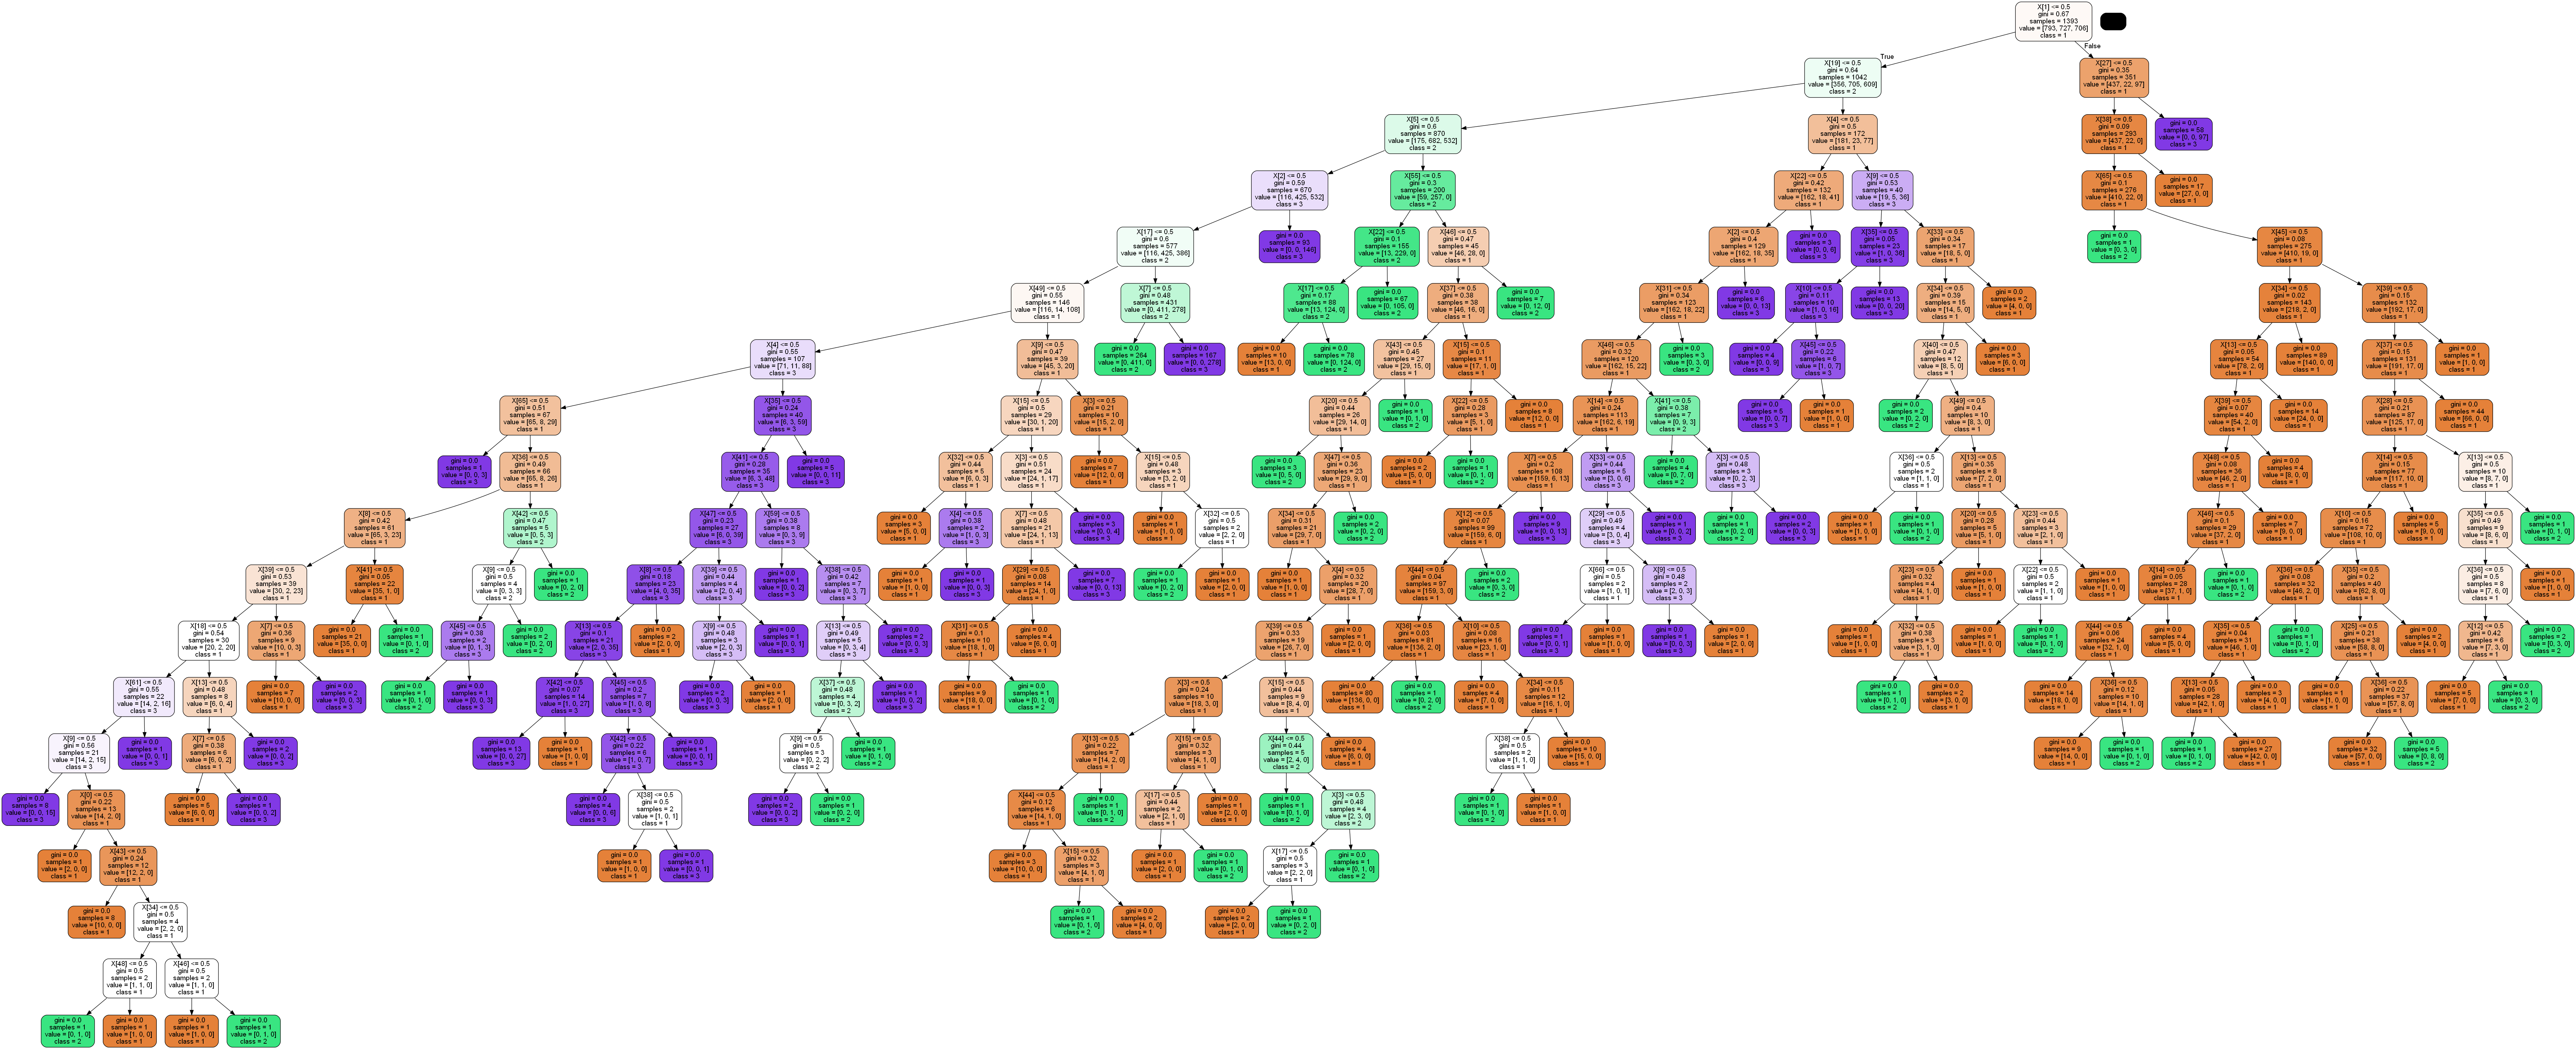

In [150]:

dotsrtc=export_graphviz(clfrtc.estimators_[0],
                class_names = ['1','2','3'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph=pydotplus.graph_from_dot_data(dotsrtc)
graph.write_png('rtc1.png')
Image(filename='rtc1.png')


findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

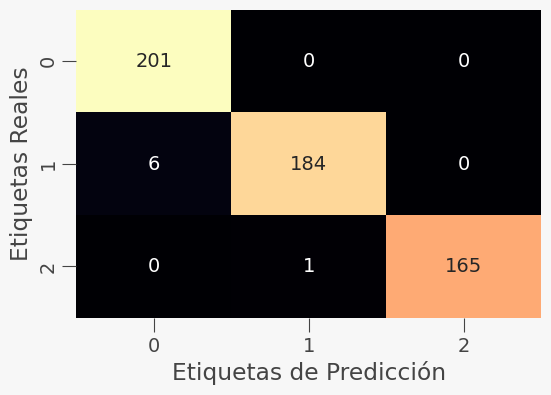

array([[201,   0,   0],
       [  6, 184,   0],
       [  0,   1, 165]], dtype=int64)

In [151]:
# Confusion matrix

cm =confusion_matrix(y_val, y_hat_val)

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm, annot=True,fmt='', cmap='magma', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

cm

In [152]:
# RANDOM TREE MODEL BEST PARAMS
parameters = {
  'n_estimators': [5,10,15,25,50,100],
  'criterion':['gini', 'entropy', 'log_loss'], 
  'max_depth':[1, 2, 3, 4, 5, 6, 8],
  'min_samples_split':[2,3,4,5],
  'max_leaf_nodes':[2,3,4,5],
  'class_weight':['balanced',None]
}

grid = GridSearchCV(
    estimator = rtc,
    param_grid=parameters,
    scoring='f1_weighted', 
    n_jobs = -1,
    error_score='raise'
)

grid.fit(X_train, np.ravel(y_train))


print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparémetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring) 

Mejor valor de exactitud obtenido con la mejor combinación: 0.9202483252246065
Mejor combinación de valores encontrados de los hiperparémetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 4, 'n_estimators': 25}
Métrica utilizada: f1_weighted


In [165]:
rtc=RandomForestClassifier(n_jobs=-1,class_weight=None,criterion='entropy', max_depth= 4, max_leaf_nodes=5, min_samples_split= 4, n_estimators=25)

clfrtc = rtc.fit(X_train,y_train)

y_hat_val=clfrtc.predict(X_val)
y_hat_test=clfrtc.predict(X_test)

print(' VALIDACION RECALL: ',classification_report(y_val,y_hat_val))
print(' PRUEBA RECALL: ',classification_report(y_test,y_hat_test))

 VALIDACION RECALL:                precision    recall  f1-score   support

         1.0       0.80      1.00      0.89       201
         2.0       1.00      0.86      0.93       190
         3.0       1.00      0.86      0.92       166

    accuracy                           0.91       557
   macro avg       0.93      0.91      0.91       557
weighted avg       0.93      0.91      0.91       557

 PRUEBA RECALL:                precision    recall  f1-score   support

         1.0       0.80      1.00      0.89       262
         2.0       1.00      0.88      0.94       197
         3.0       1.00      0.83      0.91       237

    accuracy                           0.91       696
   macro avg       0.93      0.90      0.91       696
weighted avg       0.93      0.91      0.91       696



findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

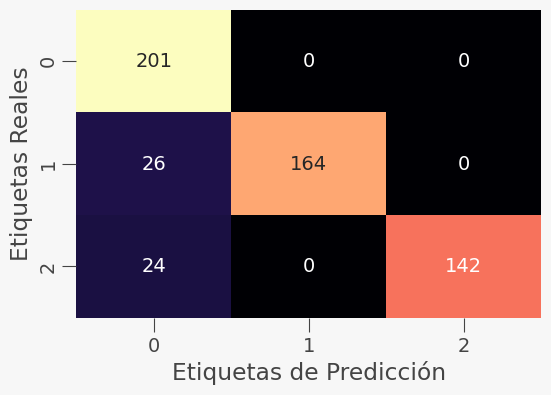

array([[201,   0,   0],
       [ 26, 164,   0],
       [ 24,   0, 142]], dtype=int64)

In [166]:
# Confusion matrix

cm =confusion_matrix(y_val, y_hat_val)

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm, annot=True,fmt='', cmap='magma', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

cm

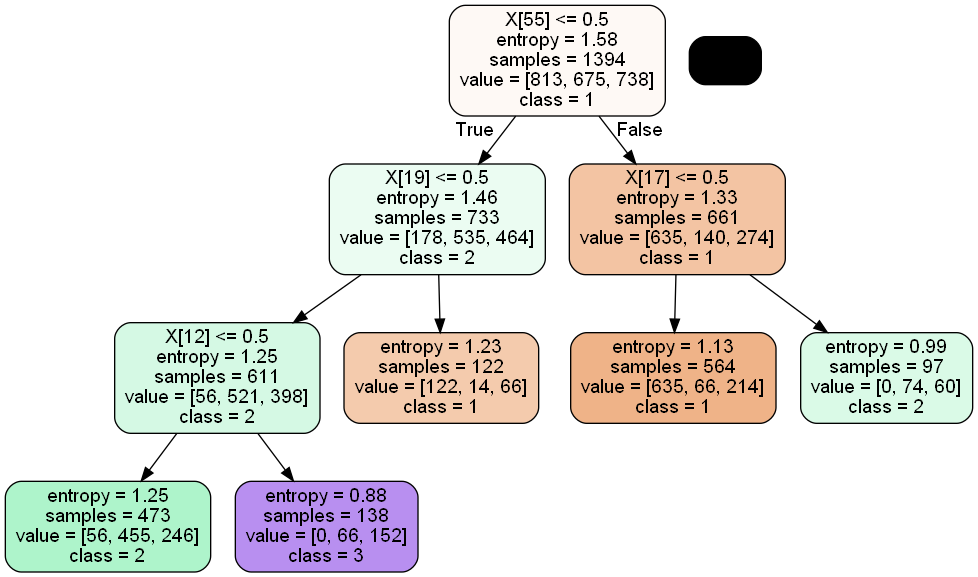

In [167]:
dotsrtc=export_graphviz(clfrtc.estimators_[0],
                class_names = ['1','2','3'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph=pydotplus.graph_from_dot_data(dotsrtc)
graph.write_png('rtc2.png')
Image(filename='rtc2.png')

In [156]:
# Decision Tree Class
dtc=DecisionTreeClassifier()

clfdtc = dtc.fit(X_train,y_train)

y_hat_val=clfdtc.predict(X_val)
y_hat_test=clfdtc.predict(X_test)

print(' VALIDACION RECALL: ',classification_report(y_val,y_hat_val))
print(' PRUEBA RECALL: ',classification_report(y_test,y_hat_test))


 VALIDACION RECALL:                precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       201
         2.0       0.99      1.00      1.00       190
         3.0       1.00      0.99      1.00       166

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557

 PRUEBA RECALL:                precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       262
         2.0       0.99      1.00      0.99       197
         3.0       1.00      0.99      1.00       237

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



In [157]:
clfdtc.feature_importances_

array([0.        , 0.        , 0.00269191, 0.        , 0.        ,
       0.        , 0.        , 0.39089418, 0.        , 0.        ,
       0.        , 0.        , 0.0141207 , 0.        , 0.        ,
       0.        , 0.        , 0.39297944, 0.        , 0.        ,
       0.        , 0.        , 0.00669166, 0.        , 0.        ,
       0.        , 0.        , 0.09951548, 0.        , 0.        ,
       0.        , 0.01313639, 0.        , 0.        , 0.        ,
       0.        , 0.03424561, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0430312 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00269342, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

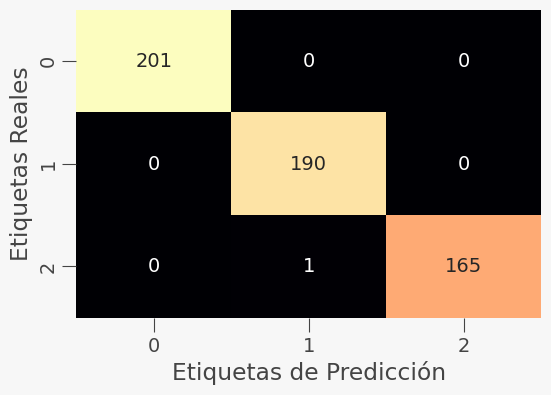

array([[201,   0,   0],
       [  0, 190,   0],
       [  0,   1, 165]], dtype=int64)

In [158]:
# Confusion matrix

cm =confusion_matrix(y_val, y_hat_val)

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm, annot=True,fmt='', cmap='magma', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

cm

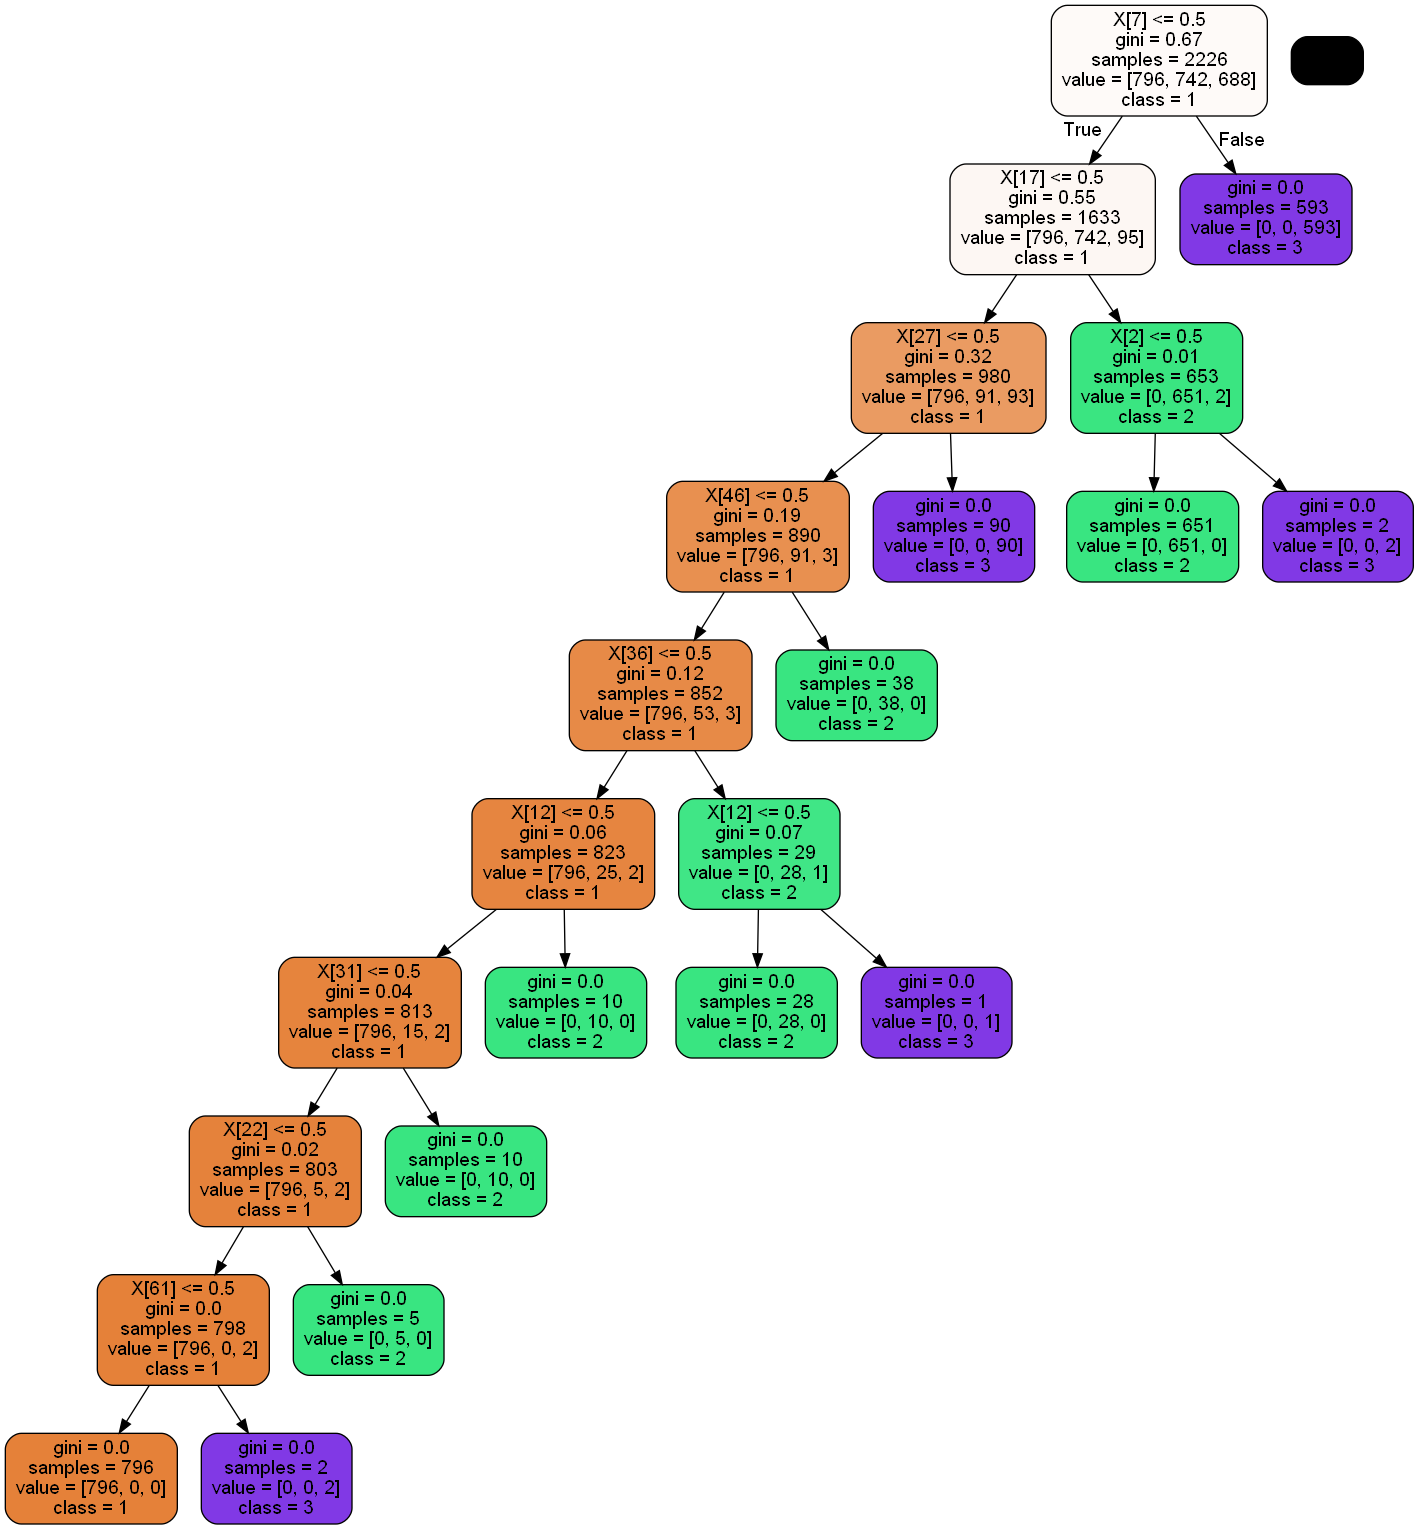

In [159]:
dotsdtc=export_graphviz(clfdtc,out_file=None,
                        class_names = ['1','2','3'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph=pydotplus.graph_from_dot_data(dotsdtc)
graph.write_png('dtc1.png')
Image(filename='dtc1.png')

In [160]:
# DESICION TREE MODEL BEST PARAMS
parameters = {
  'criterion':['gini', 'entropy', 'log_loss'], 
  'max_depth':[1, 2, 3, 4, 5, 6, 8],
  'min_samples_split':[2,3,4,5],
  'max_leaf_nodes':[2,3,4,5],
  'class_weight':['balanced',None]
}

grid = GridSearchCV(
    estimator = dtc,
    param_grid=parameters,
    scoring='f1_weighted', 
    n_jobs = -1,
    error_score='raise'
)

grid.fit(X_train, np.ravel(y_train))


print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparémetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring) 

Mejor valor de exactitud obtenido con la mejor combinación: 0.9739026081929539
Mejor combinación de valores encontrados de los hiperparémetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
Métrica utilizada: f1_weighted


In [161]:
# Decision Tree Class
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=4,max_leaf_nodes=5,min_samples_split=2)

clfdtc = dtc.fit(X_train,y_train)

y_hat_val=clfdtc.predict(X_val)
y_hat_test=clfdtc.predict(X_test)

print(' VALIDACION RECALL: ',classification_report(y_val,y_hat_val))
print(' PRUEBA RECALL: ',classification_report(y_test,y_hat_test))


 VALIDACION RECALL:                precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       201
         2.0       1.00      0.94      0.97       190
         3.0       1.00      0.99      1.00       166

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557

 PRUEBA RECALL:                precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       262
         2.0       1.00      0.92      0.96       197
         3.0       1.00      0.99      1.00       237

    accuracy                           0.98       696
   macro avg       0.98      0.97      0.97       696
weighted avg       0.98      0.98      0.98       696



In [162]:
clfdtc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4351717 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.40569868, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11333185, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04579777, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

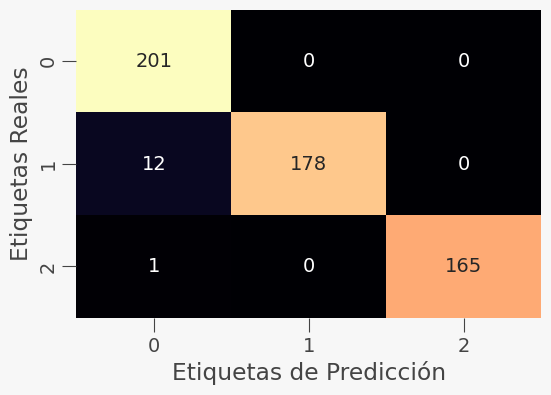

array([[201,   0,   0],
       [ 12, 178,   0],
       [  1,   0, 165]], dtype=int64)

In [163]:
# Confusion matrix

cm =confusion_matrix(y_val, y_hat_val)

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm, annot=True,fmt='', cmap='magma', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

cm

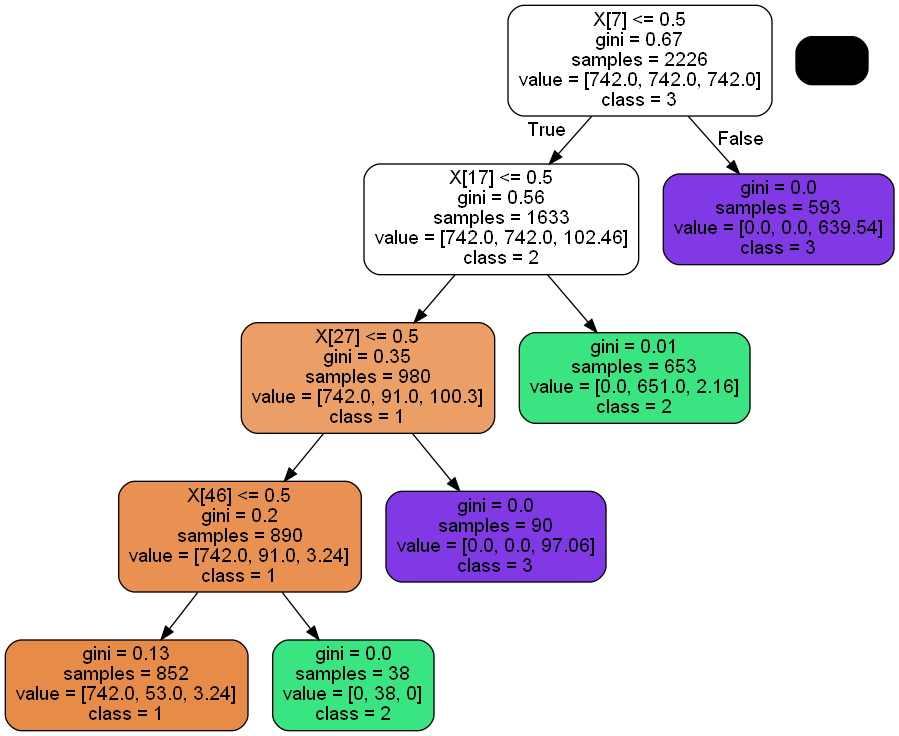

In [164]:
dotsdtc=export_graphviz(clfdtc,out_file=None,
                        class_names = ['1','2','3'],
                rounded = True, proportion = False, 
                precision = 2, filled = True
                        )

graph=pydotplus.graph_from_dot_data(dotsdtc)
graph.write_png('dtc2.png')
Image(filename='dtc2.png')